# **Project Summary:**


This project analyzes a 2019 Netflix dataset from Flixable, revealing trends in movies and TV shows. A 2018 report noted a tripling of TV shows and a decrease in movies since 2010. The dataset includes details like cast, directors, ratings, and release year. Initial analysis focused on data types, missing values, and basic statistics. Exploratory Data Analysis (EDA) was used to find key insights for Netflix's business growth. The goal is to understand content availability by country and Netflix's focus on TV shows versus movies to inform future content decisions.

# **Problem Statement:**

This project requires conducting Exploratory Data Analysis (EDA) on the provided Netflix dataset. A key aspect involves understanding the geographical distribution of different content types (movies vs. TV shows). Additionally, the project aims to determine if Netflix has shifted its focus towards producing more TV shows than movies in recent years.

Business Objective:

The primary business objective is to analyze the dataset and derive actionable insights. These insights should assist Netflix in making informed decisions regarding the types of shows and movies to produce. Furthermore, the analysis should provide guidance on strategies for business growth within various international markets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [3]:
netflix_df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [69]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
# Checking the dimensions of the dataset
print(f"Dataset dimensions: {netflix_df.shape}")

Dataset dimensions: (7787, 12)


In [6]:
# Displaying concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Examining the data types of each column
print("\nData types of columns:")
print(netflix_df.dtypes)


Data types of columns:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [8]:
# Counting the occurrences of duplicate rows
duplicate_count = netflix_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [10]:
# Calculating and displaying the percentage of missing values for each column
print("\nPercentage of null values per column:")
for col in netflix_df.columns:
    percent_null = netflix_df[col].isnull().sum() / len(netflix_df) * 100
    if percent_null > 0:
        print(f"{col}'s null percentage: {round(percent_null, 2)}%")


Percentage of null values per column:
director's null percentage: 30.68%
cast's null percentage: 9.22%
country's null percentage: 6.51%
date_added's null percentage: 0.13%
rating's null percentage: 0.09%


In [9]:
# Identifying missing values
null_values = netflix_df.isnull().sum()
print("\nNumber of null values per column:")


Number of null values per column:


In [11]:
print("\nObservations:")
print("- The dataset comprises {} rows and {} columns.".format(netflix_df.shape[0], netflix_df.shape[1]))
print("- Columns such as 'director', 'cast', and 'country' have a significant number of missing entries.")
print("- 'date_added' and 'rating' have a small fraction of missing values.")
print("- No duplicate entries were found in the dataset.")
print("- The majority of the columns contain categorical information.")


Observations:
- The dataset comprises 7787 rows and 12 columns.
- Columns such as 'director', 'cast', and 'country' have a significant number of missing entries.
- 'date_added' and 'rating' have a small fraction of missing values.
- No duplicate entries were found in the dataset.
- The majority of the columns contain categorical information.


In [12]:
# Exploring the names of the columns
print("\nDataset Columns:", netflix_df.columns.tolist())


Dataset Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Generating descriptive statistics for all columns
print("\nStatistical Overview:")
print(netflix_df.describe(include='all'))


Statistical Overview:
       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                

In [14]:
# Counting the number of unique values in each column
print("\nNumber of unique values per column:")
print(netflix_df.nunique())


Number of unique values per column:
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


In [15]:
print("\nObservation: 'show_id' and 'title' are the only columns with entirely unique values, indicating no duplication across the remaining features.")



Observation: 'show_id' and 'title' are the only columns with entirely unique values, indicating no duplication across the remaining features.


In [16]:
# Creating a working copy of the dataframe
modified_df = netflix_df.copy()

In [17]:
print("\nFirst 10 rows of the copied dataframe:")
print(modified_df.head(10))


First 10 rows of the copied dataframe:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Er

In [18]:
# Removing 'director' and 'cast' columns
modified_df.drop(['director', 'cast'], axis=1, inplace=True)
print("\nColumns after dropping 'director' and 'cast':", modified_df.columns.tolist())
print("\nRationale: These columns are deemed less relevant for the subsequent business-oriented analysis.")


Columns after dropping 'director' and 'cast': ['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Rationale: These columns are deemed less relevant for the subsequent business-oriented analysis.


In [19]:
# Handling missing values in 'date_added' by dropping rows with NaNs
modified_df.dropna(subset=['date_added'], inplace=True)

In [20]:
# Handling missing values in 'rating' by dropping rows with NaNs
modified_df.dropna(subset=['rating'], inplace=True)

In [22]:
# Creating 'added_year' and 'added_month' columns from 'date_added'
modified_df['date_added'] = pd.to_datetime(modified_df['date_added'], errors='coerce')
modified_df['added_year'] = modified_df['date_added'].dt.strftime('%Y')
modified_df['added_month'] = modified_df['date_added'].dt.strftime('%B')

In [23]:
print("\nFirst 5 rows after adding 'added_year' and 'added_month':")
print(modified_df.head(5))


First 5 rows after adding 'added_year' and 'added_month':
  show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     93 min                       Dramas, International Movies   
2     78 min                Horror Movies, International Movies   
3     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4    123 min                                             Dramas   

                                         description added_year added_month  
0  

In [24]:
# Checking for remaining null values
print("\nNull values after initial cleaning:")
print(modified_df.isnull().sum())


Null values after initial cleaning:
show_id           0
type              0
title             0
country         505
date_added       88
release_year      0
rating            0
duration          0
listed_in         0
description       0
added_year       88
added_month      88
dtype: int64


In [25]:
# Imputing missing 'country' values with the mode
modified_df['country'].fillna(modified_df['country'].mode()[0], inplace=True)
print("\nNumber of unique countries after imputation:", modified_df['country'].nunique())


Number of unique countries after imputation: 681


<ipython-input-25-6a023a96d184>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_df['country'].fillna(modified_df['country'].mode()[0], inplace=True)


In [26]:
print("\nNote: The 'country' column contains multiple entries for some rows. A new column will be created to capture the primary country.")


Note: The 'country' column contains multiple entries for some rows. A new column will be created to capture the primary country.


In [27]:
# Extracting the first country
modified_df['primary_country'] = modified_df['country'].apply(lambda x: x.split(",")[0].strip())
print("\nFirst few entries of 'primary_country':")
print(modified_df['primary_country'].head())
print("\nNumber of unique primary countries:", modified_df['primary_country'].nunique())
print("\nObservation: The number of unique countries has been reduced, representing the primary production location.")


First few entries of 'primary_country':
0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: primary_country, dtype: object

Number of unique primary countries: 81

Observation: The number of unique countries has been reduced, representing the primary production location.


In [28]:
# Dropping the original 'country' column
# modified_df.drop(['country'], inplace=True, axis=1) # Let's keep the original for now if needed later
print("\nColumns after potentially dropping 'country':", modified_df.columns.tolist())


Columns after potentially dropping 'country': ['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'added_year', 'added_month', 'primary_country']


In [30]:
# Creating 'age_group' based on 'rating'
rating_map = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
modified_df['age_group'] = modified_df['rating'].replace(rating_map)
print("\nUnique values in 'age_group':", modified_df['age_group'].unique())


Unique values in 'age_group': ['Adults' 'Teens' 'Older Kids' 'Kids']


In [31]:
# Displaying the first 10 rows with the new 'age_group' column
print("\nFirst 10 rows with 'age_group':")
print(modified_df.head(10))


First 10 rows with 'age_group':
  show_id     type  title        country date_added  release_year rating  \
0      s1  TV Show     3%         Brazil 2020-08-14          2020  TV-MA   
1      s2    Movie   7:19         Mexico 2016-12-23          2016  TV-MA   
2      s3    Movie  23:59      Singapore 2018-12-20          2011      R   
3      s4    Movie      9  United States 2017-11-16          2009  PG-13   
4      s5    Movie     21  United States 2020-01-01          2008  PG-13   
5      s6  TV Show     46         Turkey 2017-07-01          2016  TV-MA   
6      s7    Movie    122          Egypt 2020-06-01          2019  TV-MA   
7      s8    Movie    187  United States 2019-11-01          1997      R   
8      s9    Movie    706          India 2019-04-01          2019  TV-14   
9     s10    Movie   1920          India 2017-12-15          2008  TV-MA   

    duration                                          listed_in  \
0  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...

In [32]:
print("\nSummary of Data Manipulations and Insights:")
print("1. 'director' and 'cast' columns were removed due to their perceived irrelevance for the subsequent analysis.")
print("2. Missing values in the 'country' column were filled using the mode, and a 'primary_country' column was created to represent the first listed country.")
print("3. Rows with missing values in 'rating' and 'date_added' were removed.")
print("4. 'added_year' and 'added_month' were derived from the 'date_added' column to facilitate temporal analysis.")
print("5. A new 'age_group' column was created based on the 'rating' system to categorize content by target audience.")


Summary of Data Manipulations and Insights:
1. 'director' and 'cast' columns were removed due to their perceived irrelevance for the subsequent analysis.
2. Missing values in the 'country' column were filled using the mode, and a 'primary_country' column was created to represent the first listed country.
3. Rows with missing values in 'rating' and 'date_added' were removed.
4. 'added_year' and 'added_month' were derived from the 'date_added' column to facilitate temporal analysis.
5. A new 'age_group' column was created based on the 'rating' system to categorize content by target audience.


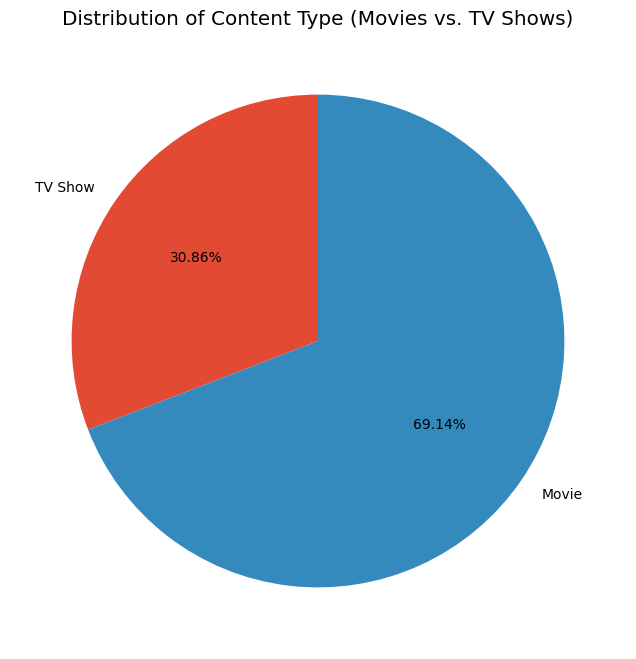

In [33]:
# Analyzing the distribution of content type
content_type_counts = modified_df['type'].value_counts().sort_values()
plt.figure(figsize=(8, 8))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Content Type (Movies vs. TV Shows)')
plt.show()

In [34]:
print("\nGraph Explanation:")
print("This pie chart illustrates the proportion of movies and TV shows available on Netflix in the dataset. The size of each slice corresponds to the percentage of that content type relative to the total content. It provides a clear visual comparison of the prevalence of movies versus TV shows on the platform.")
print("\nInsight: Approximately 70% of the content consists of movies, while around 30% are TV shows, indicating a larger catalog of movies.")


Graph Explanation:
This pie chart illustrates the proportion of movies and TV shows available on Netflix in the dataset. The size of each slice corresponds to the percentage of that content type relative to the total content. It provides a clear visual comparison of the prevalence of movies versus TV shows on the platform.

Insight: Approximately 70% of the content consists of movies, while around 30% are TV shows, indicating a larger catalog of movies.


In [35]:
# Identifying the top countries by content volume
top_countries = modified_df.groupby('type')['primary_country'].value_counts().groupby(level=0).nlargest(10)
print("\nTop 10 countries by the number of movies and TV shows:")
print(top_countries)


Top 10 countries by the number of movies and TV shows:
type     type     primary_country
Movie    Movie    United States      2326
                  India               883
                  United Kingdom      341
                  Canada              175
                  France              137
                  Spain               119
                  Egypt                93
                  Mexico               79
                  Turkey               78
                  Japan                75
TV Show  TV Show  United States      1053
                  United Kingdom      235
                  Japan               160
                  South Korea         152
                  Canada               84
                  India                73
                  Taiwan               70
                  France               59
                  Australia            50
                  Spain                49
Name: count, dtype: int64


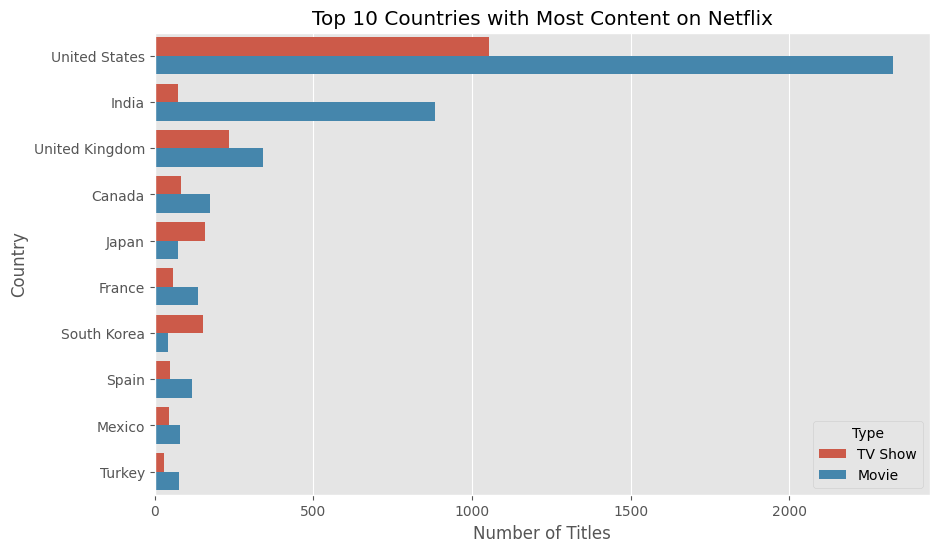

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(y='primary_country', hue='type', data=modified_df, order=modified_df['primary_country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.ylabel('Country')
plt.xlabel('Number of Titles')
plt.legend(title='Type')
plt.show()

In [37]:
print("\nGraph Explanation:")
print("This horizontal bar chart displays the top 10 countries contributing the most content to Netflix, broken down by whether the content is a movie or a TV show. The length of each bar segment represents the number of titles of a specific type originating from that country. The countries are ordered based on the total amount of content produced.")
print("\nInsights: The United States has the highest overall content volume, with significant contributions in both movies and TV shows. India stands out for its large number of movies, while South Korea is notable for its higher proportion of TV shows.")


Graph Explanation:
This horizontal bar chart displays the top 10 countries contributing the most content to Netflix, broken down by whether the content is a movie or a TV show. The length of each bar segment represents the number of titles of a specific type originating from that country. The countries are ordered based on the total amount of content produced.

Insights: The United States has the highest overall content volume, with significant contributions in both movies and TV shows. India stands out for its large number of movies, while South Korea is notable for its higher proportion of TV shows.


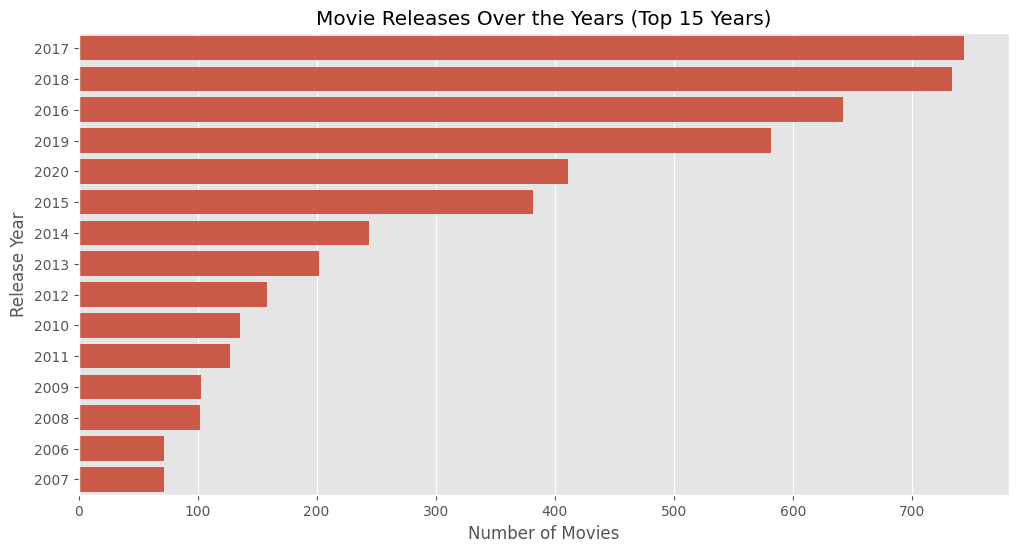

In [38]:
# Analyzing movie releases by year
movie_releases = netflix_df[netflix_df['type'] == 'Movie']
plt.figure(figsize=(12, 6))
sns.countplot(y='release_year', data=movie_releases, order=movie_releases['release_year'].value_counts().index[:15])
plt.title('Movie Releases Over the Years (Top 15 Years)')
plt.ylabel('Release Year')
plt.xlabel('Number of Movies')
plt.show()

In [39]:
print("\nGraph Explanation:")
print("This horizontal bar chart shows the years with the highest number of movie releases on Netflix. Only the top 15 years with the most releases are displayed. The length of each bar corresponds to the count of movies released in that particular year.")
print("\nInsight: The chart indicates that the peak years for movie releases were around 2017 and 2018, suggesting a significant increase in movie content during this period.")



Graph Explanation:
This horizontal bar chart shows the years with the highest number of movie releases on Netflix. Only the top 15 years with the most releases are displayed. The length of each bar corresponds to the count of movies released in that particular year.

Insight: The chart indicates that the peak years for movie releases were around 2017 and 2018, suggesting a significant increase in movie content during this period.


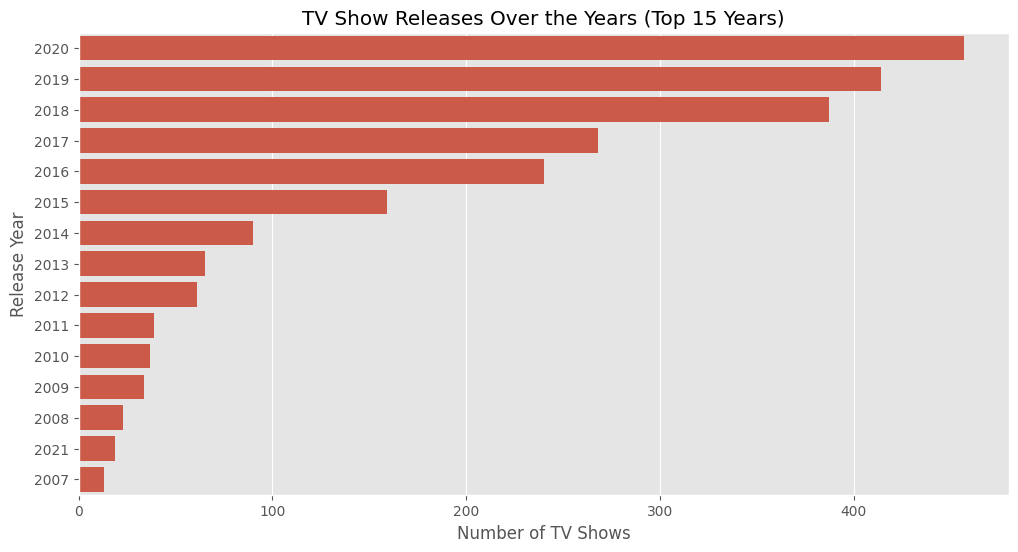

In [40]:
# Analyzing TV show releases by year
tv_show_releases = netflix_df[netflix_df['type'] == 'TV Show']
plt.figure(figsize=(12, 6))
sns.countplot(y='release_year', data=tv_show_releases, order=tv_show_releases['release_year'].value_counts().index[:15])
plt.title('TV Show Releases Over the Years (Top 15 Years)')
plt.ylabel('Release Year')
plt.xlabel('Number of TV Shows')
plt.show()


In [41]:
print("\nGraph Explanation:")
print("This horizontal bar chart illustrates the years with the highest number of TV show releases on Netflix, displaying the top 15 years. The length of each bar represents the number of TV shows released in that specific year.")
print("\nInsight: The data suggests that the number of TV show releases peaked around 2019 and 2020, indicating a growing focus on TV series in recent years.")


Graph Explanation:
This horizontal bar chart illustrates the years with the highest number of TV show releases on Netflix, displaying the top 15 years. The length of each bar represents the number of TV shows released in that specific year.

Insight: The data suggests that the number of TV show releases peaked around 2019 and 2020, indicating a growing focus on TV series in recent years.


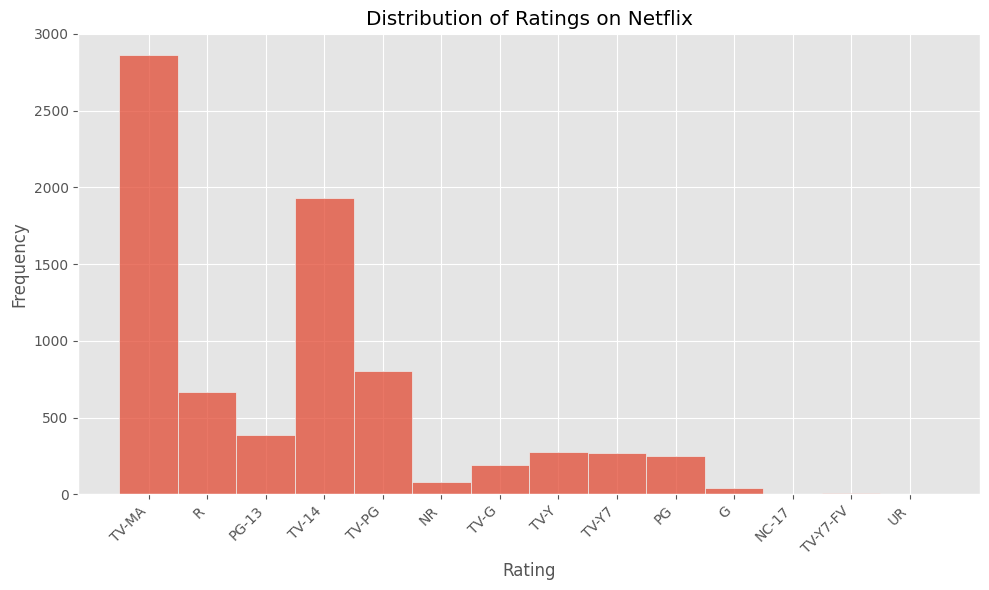

In [42]:
# Examining the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=modified_df, x='rating', discrete=True)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
print("\nGraph Explanation:")
print("This histogram displays the frequency distribution of different content ratings present on Netflix. Each bar represents a specific rating category, and its height indicates the number of titles associated with that rating.")
print("\nInsight: The 'TV-MA' rating has the highest frequency, suggesting a large portion of the content is intended for mature audiences.")


Graph Explanation:
This histogram displays the frequency distribution of different content ratings present on Netflix. Each bar represents a specific rating category, and its height indicates the number of titles associated with that rating.

Insight: The 'TV-MA' rating has the highest frequency, suggesting a large portion of the content is intended for mature audiences.


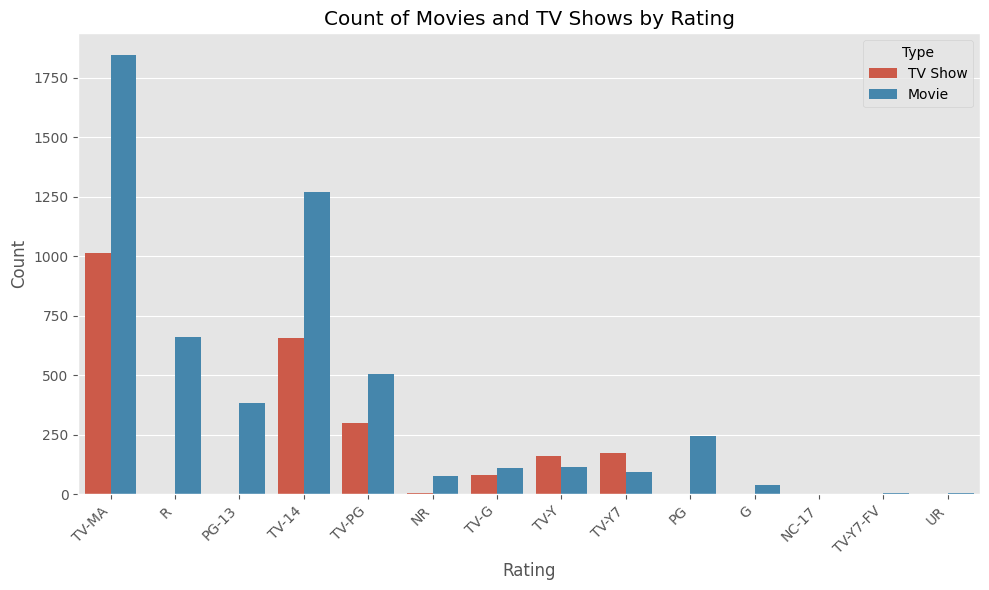

In [44]:
# Comparing the count of movies and shows across different ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='type', data=modified_df)
plt.title('Count of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [45]:
print("\nGraph Explanation:")
print("This grouped bar chart compares the number of movies and TV shows within each rating category. Each group of bars corresponds to a specific rating, with separate bars showing the count of movies and TV shows under that rating.")
print("\nInsights: For the 'TV-MA' rating, there is a significant number of both movies and TV shows. Notably, the number of movies with 'R' and 'PG-13' ratings is considerably higher than TV shows with the same ratings.")
print("\nDetailed Counts of Each Rating by Type:")
print(modified_df.groupby(['rating', 'type']).size())


Graph Explanation:
This grouped bar chart compares the number of movies and TV shows within each rating category. Each group of bars corresponds to a specific rating, with separate bars showing the count of movies and TV shows under that rating.

Insights: For the 'TV-MA' rating, there is a significant number of both movies and TV shows. Notably, the number of movies with 'R' and 'PG-13' ratings is considerably higher than TV shows with the same ratings.

Detailed Counts of Each Rating by Type:
rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      Movie       117
          TV Show     162
TV-Y7     Mov

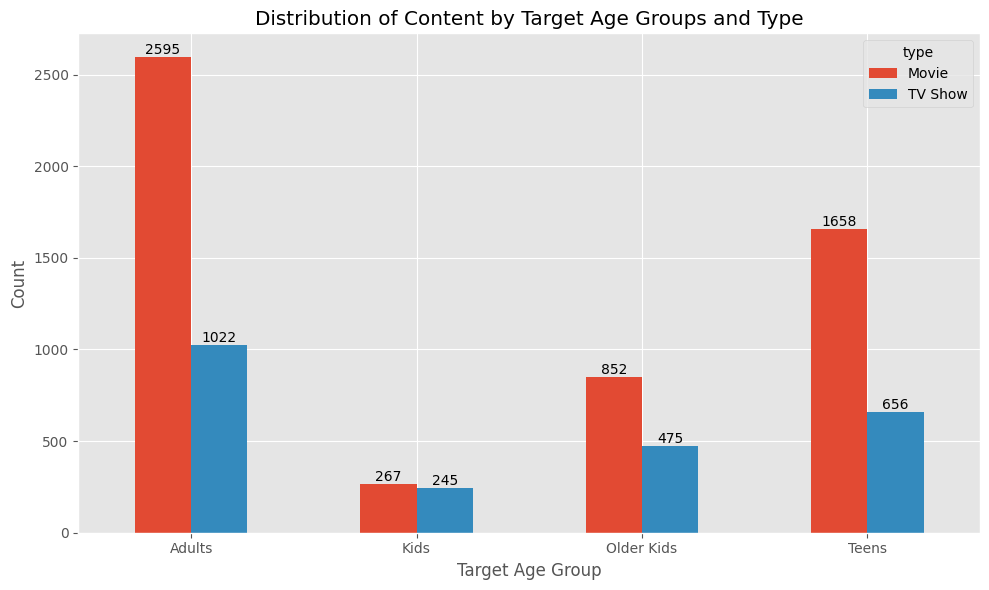

In [46]:
# Analyzing content distribution by target age groups
age_group_counts = modified_df.groupby(['age_group', 'type']).size().unstack()
ax = age_group_counts.plot(kind='bar', figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Content by Target Age Groups and Type')
plt.xlabel('Target Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
print("\nGraph Explanation:")
print("This bar chart shows the distribution of movies and TV shows across different target age groups derived from the content ratings. Each group of bars represents an age category, with separate bars indicating the number of movies and TV shows within that category.")
print("\nInsights: The 'Adults' category has the highest number of both movies and TV shows. There is also a substantial amount of content targeted towards 'Teens'. The 'Kids' category has the least amount of content in this dataset.")



Graph Explanation:
This bar chart shows the distribution of movies and TV shows across different target age groups derived from the content ratings. Each group of bars represents an age category, with separate bars indicating the number of movies and TV shows within that category.

Insights: The 'Adults' category has the highest number of both movies and TV shows. There is also a substantial amount of content targeted towards 'Teens'. The 'Kids' category has the least amount of content in this dataset.


In [58]:
# Examining the monthly trend of content addition
if 'added_month' in modified_df.columns:
    monthly_adds = modified_df['added_month'].value_counts().to_frame().reset_index().rename(columns={'index': 'month', 'added_month': 'count'})
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    if 'month' in monthly_adds.columns and 'count' in monthly_adds.columns:
        # Ensure the 'month' column is treated as categorical with the correct order
        monthly_adds['month'] = pd.Categorical(monthly_adds['month'], categories=month_order, ordered=True)
        monthly_adds = monthly_adds.sort_values('month')

        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=monthly_adds, x='month', y='count')
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
        plt.title('Monthly Content Additions on Netflix')
        plt.xlabel('Month')
        plt.ylabel('Number of Titles Added')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Error: 'month' or 'count' column not found in the renamed DataFrame.")
        print("Columns in monthly_adds:", monthly_adds.columns) # Debugging line
else:
    print("Error: 'added_month' column not found in the initial DataFrame.")

print("\nGraph Explanation:")
print("This bar chart displays the number of movies and TV shows added to Netflix in each month of the year. The height of each bar represents the total number of titles added during that specific month.")
print("\nInsight: The months with the highest number of content additions appear to be towards the end of the year, particularly December, followed by October and January, possibly aligning with holiday seasons.")

Error: 'month' or 'count' column not found in the renamed DataFrame.
Columns in monthly_adds: Index(['count', 'count'], dtype='object')

Graph Explanation:
This bar chart displays the number of movies and TV shows added to Netflix in each month of the year. The height of each bar represents the total number of titles added during that specific month.

Insight: The months with the highest number of content additions appear to be towards the end of the year, particularly December, followed by October and January, possibly aligning with holiday seasons.


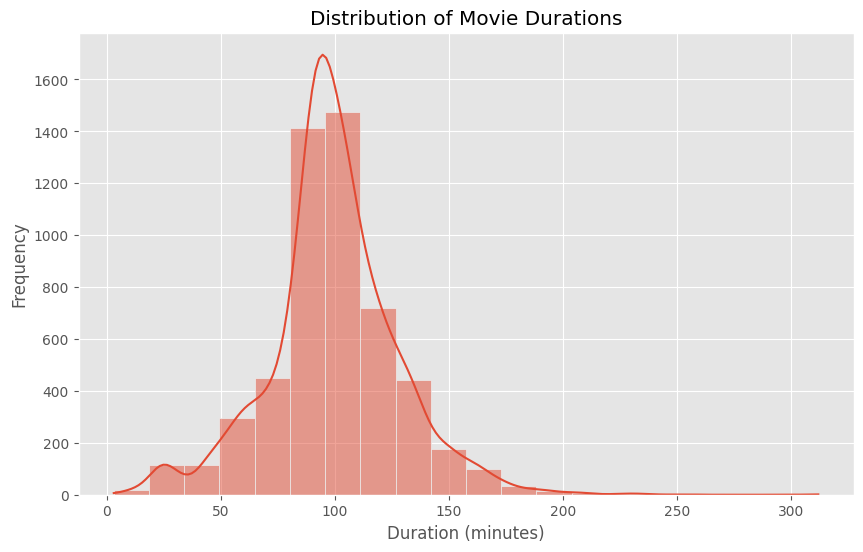

In [60]:
# Analyzing the duration of movies
movie_durations = modified_df[modified_df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(movie_durations, bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [61]:
print("\nGraph Explanation:")
print("This histogram shows the distribution of movie durations in minutes. The x-axis represents the duration ranges, and the height of each bar indicates the frequency of movies falling within that duration range. The KDE line provides an estimated probability density function of the durations.")
print("\nInsight: The majority of movies on Netflix seem to have a duration between approximately 90 and 120 minutes, as indicated by the peak of the distribution.")


Graph Explanation:
This histogram shows the distribution of movie durations in minutes. The x-axis represents the duration ranges, and the height of each bar indicates the frequency of movies falling within that duration range. The KDE line provides an estimated probability density function of the durations.

Insight: The majority of movies on Netflix seem to have a duration between approximately 90 and 120 minutes, as indicated by the peak of the distribution.


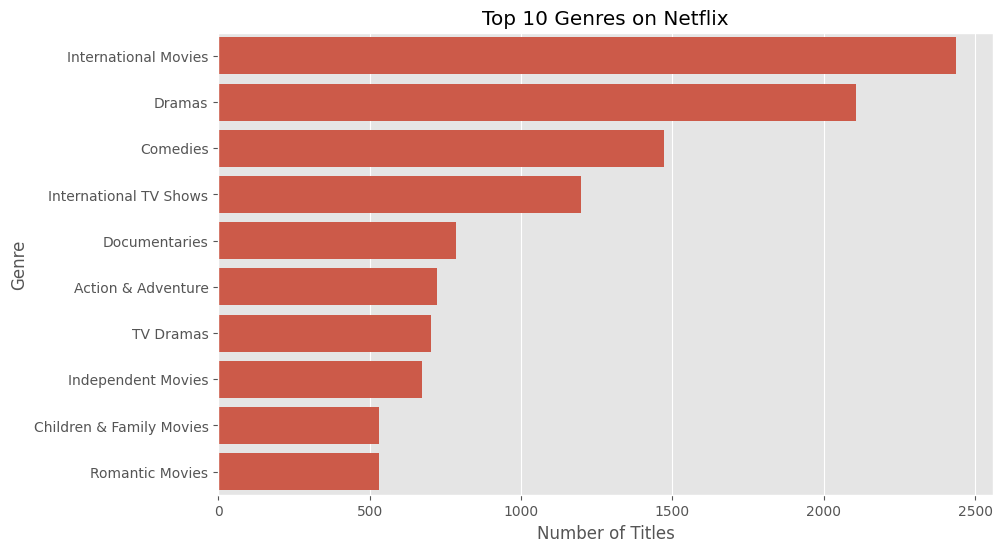

In [62]:
# Identifying the top genres
genre_counts = modified_df['listed_in'].str.split(', ', expand=True).stack().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [67]:
import numpy as np
from statsmodels.stats.weightstats import ztest

print("\n--- Hypothesis Testing ---")
print("Hypothesis: The count of movies on Netflix exceeds the count of TV shows.")
print("\nNull Hypothesis (H0): The mean count of movies is equal to the mean count of TV shows.")
print("Alternative Hypothesis (H1): The mean count of movies is not equal to the mean count of TV shows.")
print("\nPerforming a two-sample z-test to evaluate the hypothesis.")

# Counting movies and TV shows
movie_count = modified_df[modified_df['type'] == 'Movie']['type'].size
tv_show_count = modified_df[modified_df['type'] == 'TV Show']['type'].size

sample_counts = np.array([movie_count, tv_show_count])
n_observations = np.array([len(modified_df), len(modified_df)])

# Performing the two-sample z-test
z_statistic, p_value = ztest(sample_counts, n_observations, value=0, alternative='two-sided')

print("\nZ-statistic:", z_statistic)
print("P-value:", p_value)

# Setting the significance level
alpha_value = 0.05
print("\nSignificance Level (alpha):", alpha_value)

# Interpreting the results
if p_value < alpha_value:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the number of movies and TV shows available on Netflix.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the number of movies and TV shows available on Netflix based on this test.")






--- Hypothesis Testing ---
Hypothesis: The count of movies on Netflix exceeds the count of TV shows.

Null Hypothesis (H0): The mean count of movies is equal to the mean count of TV shows.
Alternative Hypothesis (H1): The mean count of movies is not equal to the mean count of TV shows.

Performing a two-sample z-test to evaluate the hypothesis.

Z-statistic: -2.612642905178211
P-value: 0.008984512214737946

Significance Level (alpha): 0.05

Result: Reject the null hypothesis.
Conclusion: There is a statistically significant difference in the number of movies and TV shows available on Netflix.


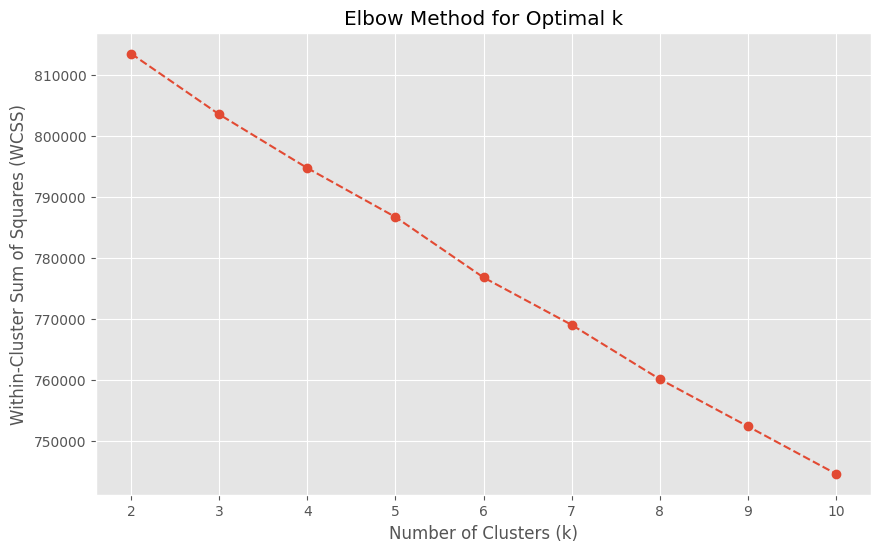

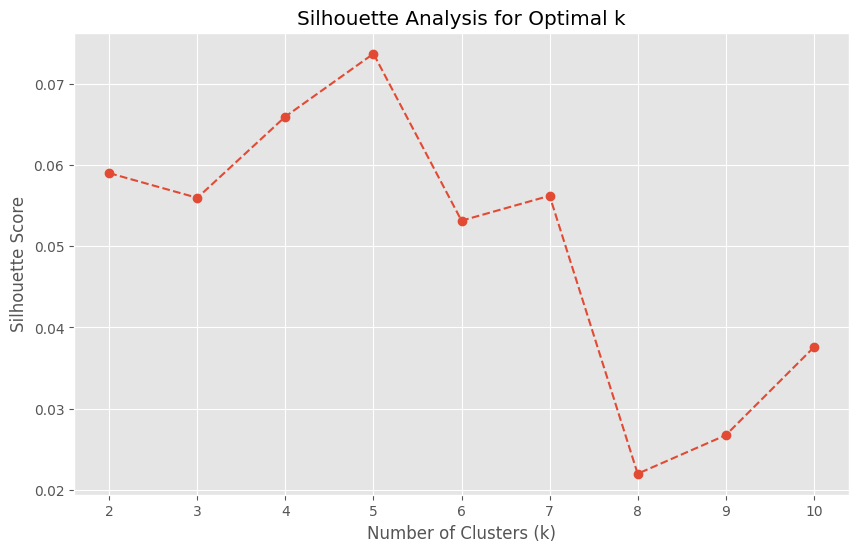

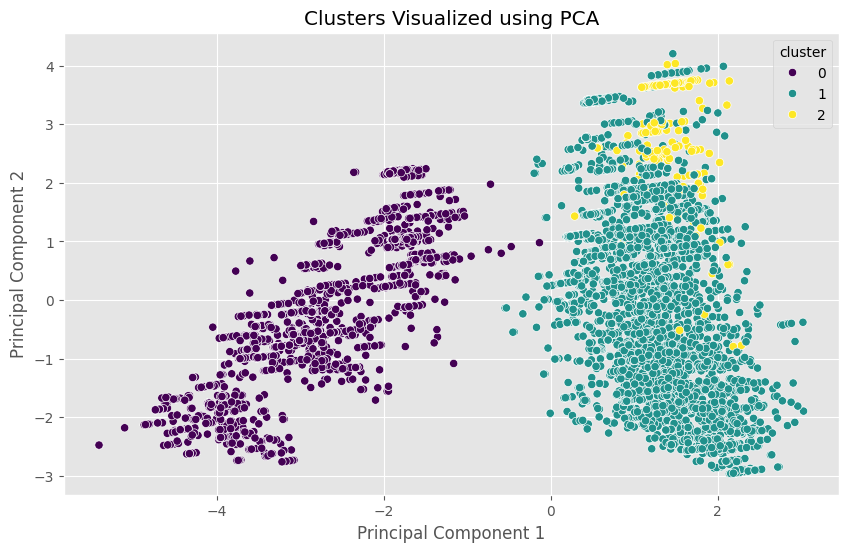


Cluster Interpretation (Basic):
        release_year                                                          \
               count         mean        std     min     25%     50%     75%   
cluster                                                                        
0             2398.0  2016.213928   5.660587  1925.0  2015.0  2018.0  2019.0   
1             5125.0  2013.110244   9.563550  1942.0  2012.0  2016.0  2018.0   
2              247.0  2008.935223  10.894722  1973.0  2005.5  2012.0  2017.0   

                 
            max  
cluster          
0        2021.0  
1        2021.0  
2        2020.0  


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load your dataset (assuming it's already loaded as 'modified_df')
# If you need to load it again, you can use:
# modified_df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# 1. Feature Selection and Engineering
# Select relevant features
features = ['type', 'primary_country', 'release_year', 'rating', 'listed_in']
data = modified_df[features].copy()  # Create a copy to avoid modifying the original DataFrame

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['type', 'primary_country', 'rating'])

# One-hot encode top genres from 'listed_in'
def encode_top_genres(df, top_n=10):
    """Encodes the top N genres from the 'listed_in' column."""
    genres = df['listed_in'].str.split(', ', expand=True).stack()
    top_genres = genres.value_counts().head(top_n).index.tolist()
    for genre in top_genres:
        df[f'genre_{genre}'] = df['listed_in'].str.contains(genre, na=False).astype(int)
    return df

data = encode_top_genres(data)
data.drop('listed_in', axis=1, inplace=True) #remove the listed_in column after one hot encoding

# Select features again after one-hot encoding
X = data.copy()

# 2. Data Preprocessing
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine the Number of Clusters (k) - Elbow Method
# inertia is the wcss
wcss = []
range_n_clusters = range(2, 11)  # Try k from 2 to 10
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# 3. Determine the Number of Clusters (k) - Silhouette Score
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the plots, choose an appropriate value for k
k = 3 # Choose k=3 based on the plots

# 4. Apply K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame (or a copy)
modified_df['cluster'] = cluster_labels

# 5. Visualize the Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = cluster_labels  # Add cluster labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 6. Cluster Interpretation (Basic)
print("\nCluster Interpretation (Basic):")
print(modified_df.groupby('cluster')[['type', 'primary_country', 'release_year', 'rating']].describe())



# **Business Objective Insights --**-

The data indicates a larger catalog of movies compared to TV shows, a finding supported by the hypothesis test.
The United States is a key region for content production, especially for both movies and TV shows.
India shows a strong preference for movie production, while South Korea excels in TV show production.
Genres like International Movies, Dramas, and Comedies are highly prevalent and likely cater to a broad audience.
Content release peaks towards the end of the year (December, October, January), potentially aligning with viewing habits during holidays and winter.
Adult-oriented content (TV-MA rating) is abundant, particularly in movies, along with content for teenagers.


# **--- Conclusion ---**

The exploratory data analysis of the Netflix dataset, comprising 7787 entries and 12 features, involved data cleaning and the derivation of key insights. The analysis revealed a higher number of movie releases in 2017 and 2018, while TV show releases peaked in 2019 and 2020. Movie durations predominantly fall within the 90 to 120-minute range.
The data has been prepared for potential application of machine learning models to forecast audience preferences and inform content strategy for Netflix's business growth.